In [1]:
from random import randint, sample, random, seed
from itertools import chain
from scipy import sparse
from scipy.special import expit
import numpy as np
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
from numpy.random import choice
from numpy import array
from math import floor, ceil

%matplotlib inline

print = PrettyPrinter(indent=4).pprint

In [187]:

def _create_conections(n_nodes=10, ):


    test = sparse.lil_matrix((n_nodes, n_nodes))

    indexes = np.array(sample(range(n_nodes), 5))

    test[0, 1] = 1

    print(vec)

    out = test.dot(vec)

print(out)

NameError: name 'out' is not defined

In [ ]:
my_dict = {'test': 5}
ret = my_dict.get('other')
print(ret)

In [172]:
seed(1)
sample(range(50), 3)

[8, 36, 48]

In [ ]:
%whos

In [ ]:


mean = 4.4
n_projecting_nodes = 1000
low = int(floor(mean))
high = int(ceil(mean))
pl = high - mean
ph = 1 - pl

arr = array(choice([low, high], n_projecting_nodes, p=[pl, ph]), dtype=int)
np.sum(arr)/n_projecting_nodes

In [7]:
_INITIAL_UNITS = 2

_INITIAL_MIN_NODES = 8

_INITIAL_MAX_NODES = 14

_INITIAL_LAYERS_MIN = 3

_INITIAL_LAYERS_MAX = 5

_INITIAL_MU_RANGE = 0.5

_INITIAL_SIGMA = 0.3

_INITIAL_OUTDEGREE_MIN = 1

_INITIAL_OUTDEGREE_MAX = 4

_INITIAL_PROJECTIONS_PER_LAYER = 2

_N_INPUT_UNITS = 14

_N_OUTPUT_UNITS = 5


def _rand_range(rng):
    return random() * 2 * rng - rng


def _create_initial_structure():
    """Create the inital randomized structure for the agent.

    For the structure, see the ANNStructuredAgent configuration below.

    """
    seed(11)
    # Create units (populations or columns) and layers with their nodes count.
    structure = [
        [(randint(_INITIAL_MIN_NODES, _INITIAL_MAX_NODES), {})
            for _ in range(randint(_INITIAL_LAYERS_MIN, _INITIAL_LAYERS_MAX))]
        for _ in range(_INITIAL_UNITS)
    ]
    
    structure[0][0] = (_N_INPUT_UNITS, {})    
    structure[-1][-1] = (_N_OUTPUT_UNITS, {})
    
    print(structure)
    
    nodes = list(chain.from_iterable([[i[0] for i in j] for j in structure]))
    n_layers = len(nodes)
    n_nodes = sum(nodes)
    print(n_nodes)

    
    # For each layer in each unit: add the configuration (connections).
    
    for j, unit in enumerate(structure):
        for i, (_, conns) in enumerate(unit):
            # Connect this layer to other layers in the same unit.
            others = sample([n for n in range(len(unit)) if n != 0], _INITIAL_PROJECTIONS_PER_LAYER)
            for o in others:
                conns[o] = (
                    _rand_range(_INITIAL_MU_RANGE), _INITIAL_SIGMA,
                    randint(_INITIAL_OUTDEGREE_MIN, _INITIAL_OUTDEGREE_MAX))
            # Connect the last layer of the current unit to other units.
            if i == len(unit) - 1 and j < len(structure) - 1:
                others = [n for n in range(len(structure)) if n != j]
                conns[None] = {
                    n: (abs(_rand_range(_INITIAL_MU_RANGE)), _INITIAL_SIGMA,
                        randint(
                            _INITIAL_OUTDEGREE_MIN, _INITIAL_OUTDEGREE_MAX))
                    for n in others}
    # TODO: set nodes count for global input and output manually.
    return structure, nodes, n_nodes, n_layers

structure, nodes, n_nodes, n_layers = _create_initial_structure()





print(structure)

[   [(14, {}), (12, {}), (14, {}), (14, {})],
    [(11, {}), (12, {}), (14, {}), (5, {})]]
96
[   [   (   14,
            {   1: (0.30390031272104856, 0.3, 4),
                3: (0.12988272021680192, 0.3, 2)}),
        (   12,
            {   1: (-0.1965987373754745, 0.3, 1),
                2: (0.038693508577678504, 0.3, 1)}),
        (   14,
            {   2: (0.12312845151871987, 0.3, 1),
                3: (0.46475778112556676, 0.3, 2)}),
        (   14,
            {   None: {1: (0.17370664745173525, 0.3, 2)},
                1: (-0.30979173720207087, 0.3, 2),
                3: (0.09961808495285052, 0.3, 4)})],
    [   (   11,
            {   1: (-0.4954062278386241, 0.3, 1),
                3: (0.1402917079191771, 0.3, 4)}),
        (   12,
            {   2: (-0.0932212621148214, 0.3, 1),
                3: (0.20780962149794946, 0.3, 3)}),
        (   14,
            {   1: (-0.47024808771741766, 0.3, 1),
                2: (-0.09960019508150897, 0.3, 3)}),
        (   5,
   

In [18]:
def foo(result, i):
    i += 1
    print((i, result))
    if i == 10: 
        return result
    else: 
        foo(expit(result), i)

foo(0, 0)
1-1/np.e

(1, 0)
(2, 0.5)
(3, 0.62245933120185459)
(4, 0.65077767821470034)
(5, 0.65718568927725118)
(6, 0.65862790952095107)
(7, 0.65895210003927285)
(8, 0.65902495299094022)
(9, 0.65904132366557999)
(10, 0.65904500224248286)


0.6321205588285577

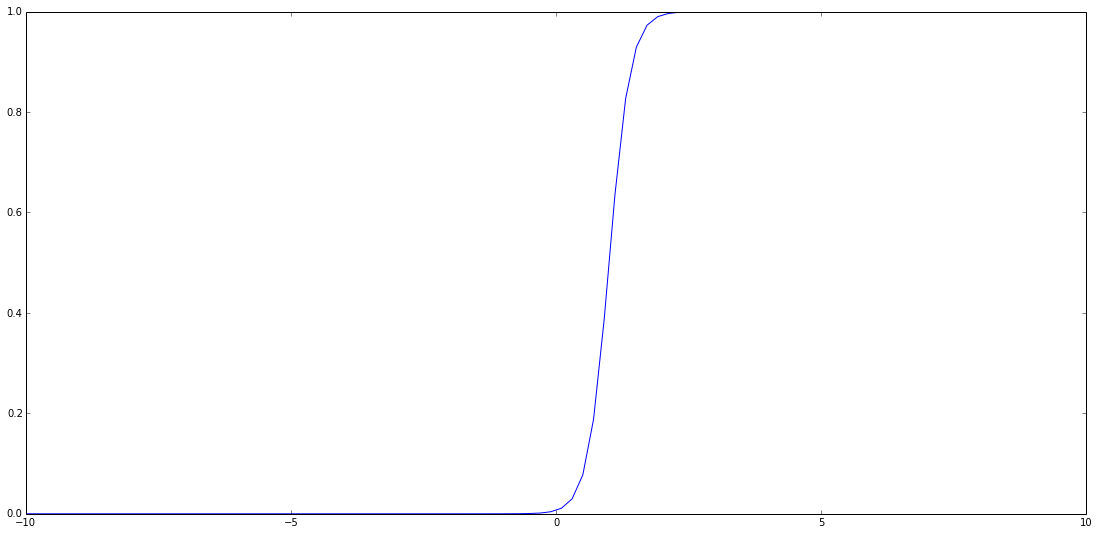

In [16]:
x = np.linspace(-10,10,100)

shift = 5
frac = 5

plt.figure(figsize=(19,9))
plt.plot(x, expit((x)*frac-shift))